In [41]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
!pip install geopandas --user
import geopandas as gpd

In [43]:
os.getcwd()
os.chdir(r'C:\Users\Raúl\Documents')

In [44]:
##defining the function to replace values according to the codes

def replace_set(df, column, keys, values):
    for i in range(len(keys)):
        df[column] = df[column].replace(keys[i], values[i].strip())

    

In [45]:
## reading the set and defining the columns
df = pd.read_table("10021911.DAT",header=None)
df_candidaturas = pd.read_table("03021911.DAT",header=None, encoding='latin-1')
df['comunidad']=df[0].map(lambda x: x[9:11])
df['provincia']=df[0].map(lambda x: x[11:13])
df['municipio']=df[0].map(lambda x: x[13:16])
df['candidatura']=df[0].map(lambda x: x[23:29])
df['votos obtenidos']=df[0].map(lambda x: x[29:36])
df['cod_municipio']=df[0].map(lambda x: x[9:16])
df['cod_distrito']=df[0].map(lambda x: x[9:18])
df['cod_distrito_short']=df[0].map(lambda x: x[16:18])
df['cod_seccion_sort']=df[0].map(lambda x: x[17:22])
df['cod_seccion']=df[0].map(lambda x: x[18:22])
df['cod_mesa']=df[0].map(lambda x: x[22:23])
df['cod_unidad']=df[0].map(lambda x: x[13:22])

In [46]:

datos = {
    'Andalucía': {'Almería': '04', 'Cádiz': '11', 'Córdoba': '14', 'Granada': '18', 'Huelva': '21', 'Jaén': '23', 'Málaga': '29', 'Sevilla': '41'},
    'Aragón': {'Huesca': '22', 'Teruel': '44', 'Zaragoza': '50'},
    'Asturias, Principado de': {'Asturias': '33'},
    'Balears, Illes': {'Balears, Illes': '07'},
    'Canarias': {'Palmas, Las': '35', 'Santa Cruz de Tenerife': '38'},
    'Cantabria': {'Cantabria': '39'},
    'Castilla y León': {'Ávila': '05', 'Burgos': '09', 'León': '24', 'Palencia': '34', 'Salamanca': '37', 'Segovia': '40', 'Soria': '42', 'Valladolid': '47', 'Zamora': '49'},
    'Castilla-La Mancha': {'Albacete': '02', 'Ciudad Real': '13', 'Cuenca': '16', 'Guadalajara': '19', 'Toledo': '45'},
    'Cataluña': {'Barcelona': '08', 'Girona': '17', 'Lleida': '25', 'Tarragona': '43'},
    'Comunitat Valenciana': {'Alicante/Alacant': '03', 'Castellón/Castelló': '12', 'Valencia/València': '46'},
    'Extremadura': {'Badajoz': '06', 'Cáceres': '10'},
    'Galicia': {'Coruña, A': '15', 'Lugo': '27', 'Ourense': '32', 'Pontevedra': '36'},
    'Madrid, Comunidad de': {'Madrid': '28'},
    'Murcia, Región de': {'Murcia': '30'},
    'Navarra, Comunidad Foral de': {'Navarra': '31'},
    'País Vasco': {'Araba/Álava': '01', 'Bizkaia': '48', 'Gipuzkoa': '20'},
    'Rioja, La': {'Rioja, La': '26'},
    'Ceuta': {'Ceuta': '51'},
    'Melilla': {'Melilla': '52'}
}

df_codigos = pd.DataFrame([(comunidad, provincia, codigo) for comunidad, provincias in datos.items() for provincia, codigo in provincias.items()], columns=['Comunidad Autónoma', 'Provincia', 'Código'])
df_codigos=df_codigos.set_index('Código')



In [47]:
#adding parties based on the codes
codigo_candidatura=df_candidaturas[0].map(lambda x: x[8:14])
denominacion_candidatura=df_candidaturas[0].map(lambda x: x[64:214])
df=df.join(df_codigos, on='provincia')
replace_set(df,'candidatura',codigo_candidatura, denominacion_candidatura)

In [48]:
#adding the city names
df_municipios = pd.read_table("05021911.DAT",header=None,encoding='latin-1')
codigo_municipios=df_municipios[0].map(lambda x: x[9:16])
codigo_distrito=df_municipios[0].map(lambda x: x[9:18])
nombre_municipio=df_municipios[0].map(lambda x: x[18:118])

In [49]:
#droping votes of citizens living abroad
df['municipio']=df['municipio'].replace('999','CERA')
df=df[df['municipio']!='CERA']
df_cera=df[df['municipio']=='CERA']

In [51]:
replace_set(df,'cod_municipio', codigo_municipios, nombre_municipio)

In [52]:
df['cod_municipio_new']=df['cod_municipio']+'-'+df['cod_distrito_short']
df=df.set_index(['cod_municipio_new','candidatura'])
df['votos obtenidos']=df['votos obtenidos'].astype('int')
df['votos_can_distrito']=df.groupby(['cod_municipio_new','candidatura'])['votos obtenidos'].sum()
df=df.reset_index()
df=df[['Comunidad Autónoma','Provincia','candidatura','votos obtenidos','cod_municipio','votos_can_distrito','cod_municipio_new']]

# Ganador por municipio

In [62]:
df_municipio=df.groupby(['cod_municipio','candidatura'])['votos obtenidos'].sum()
ganador=df_municipio.groupby('cod_municipio').nlargest(1)
ganador=ganador.to_frame()
ganador=ganador.reset_index(allow_duplicates=True).T.drop_duplicates(). T 

In [63]:


mapping = {
    'PARTIDO SOCIALISTA OBRERO ESPAÑOL': 'PARTIDO SOCIALISTA OBRERO ESPAÑOL',
    'PARTIDO POPULAR': 'PARTIDO POPULAR',
    'VOX': 'VOX',
    'UNIDAS PODEMOS': 'UNIDAS PODEMOS',
    'ESQUERRA REPUBLICANA DE CATALUNYA-SOBIRANISTES': 'ERC',
    'EUSKAL HERRIA BILDU': 'BILDU',
    'PARTIDO DOS SOCIALISTAS DE GALICIA-PSOE': 'PARTIDO SOCIALISTA OBRERO ESPAÑOL',
    'PARTIDO SOCIALISTA DE EUSKADI-EUSKADIKO EZKERRA': 'PARTIDO SOCIALISTA OBRERO ESPAÑOL',
    'EUZKO ALDERDI JELTZALEA-PARTIDO NACIONALISTA VASCO': 'PNV',
    'JUNTS PER CATALUNYA-JUNTS': 'JUNTS',
    'CIUDADANOS-PARTIDO DE LA CIUDADANIA': 'CIUDADANOS',
    'UNIDAS PODEMOS-UNIDES PUDEM': 'UNIDAS PODEMOS',
    'UNIDAS PODEMOS-ALTOARAGÓN EN COMUN': 'UNIDAS PODEMOS',
    'EN COMÚN PUDEM- GUANYEM EL CANVI': 'UNIDAS PODEMOS',
    # Add more mappings as needed
}

ganador['candidatura_new'] = ganador['candidatura'].map(mapping).fillna('OTROS')


In [69]:

import geopandas as gpd
españa=gpd.read_file('mapas/gadm36_ESP_4.shp')
españa = españa.merge(ganador, right_on=['cod_municipio'],left_on=['NAME_4'], how='left')
españa=españa.drop(españa[españa['NAME_1']=='Islas Canarias'].index)

C:\Users\Raúl\AppData\Roaming\Python\Python38\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


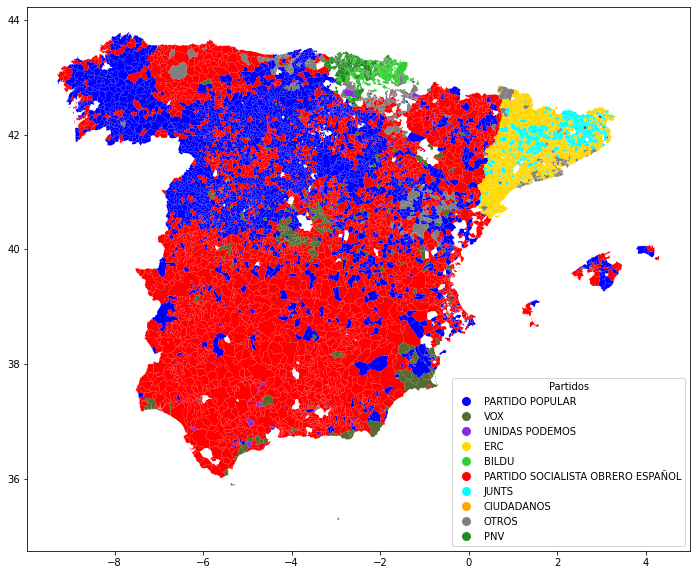

In [77]:

colores = {
    'PARTIDO POPULAR': 'b',
    'VOX': 'darkolivegreen',
    'UNIDAS PODEMOS': 'blueviolet',
    'ERC': 'gold',
    'BILDU': 'limegreen',
    'PARTIDO SOCIALISTA OBRERO ESPAÑOL': 'red',
    'JUNTS': 'aqua',
    'CIUDADANOS': 'orange',
    'OTROS': 'grey',
    'PNV':'forestgreen'
}


default_color = 'white'

españa['colores'] = españa['candidatura_new'].map(colores).fillna(default_color)

españa.plot(column='candidatura_new', legend=True, color=españa['colores'],)
plt.rcParams["figure.figsize"] = (20, 10)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in colores.items()]
plt.legend(handles=handles, title='Partidos',loc='lower right')
plt.show()


# Salamanca

In [53]:
##preparing the dataset. Winner by city

df_salamanca=df[df['Provincia']=='Salamanca']
df_salamanca=df_salamanca.groupby(['cod_municipio','candidatura'])['votos obtenidos'].sum()

df_salamanca=df_salamanca.groupby('cod_municipio').nlargest(1)
df_salamanca=df_salamanca.to_frame().reset_index(allow_duplicates=True).T.drop_duplicates(). T 
mapping = {
    'PARTIDO SOCIALISTA OBRERO ESPAÑOL': 'PARTIDO SOCIALISTA OBRERO ESPAÑOL',
    'PARTIDO POPULAR': 'PARTIDO POPULAR',
    'VOX': 'VOX',
    'UNIDAS PODEMOS': 'UNIDAS PODEMOS',
    'ESQUERRA REPUBLICANA DE CATALUNYA-SOBIRANISTES': 'ERC',
    'EUSKAL HERRIA BILDU': 'BILDU',
    'PARTIDO DOS SOCIALISTAS DE GALICIA-PSOE': 'PARTIDO SOCIALISTA OBRERO ESPAÑOL',
    'PARTIDO SOCIALISTA DE EUSKADI-EUSKADIKO EZKERRA': 'PARTIDO SOCIALISTA OBRERO ESPAÑOL',
    'EUZKO ALDERDI JELTZALEA-PARTIDO NACIONALISTA VASCO': 'PNV',
    'JUNTS PER CATALUNYA-JUNTS': 'JUNTS',
    'CIUDADANOS-PARTIDO DE LA CIUDADANIA': 'CIUDADANOS',
    'UNIDAS PODEMOS-UNIDES PUDEM': 'UNIDAS PODEMOS',
    'UNIDAS PODEMOS-ALTOARAGÓN EN COMUN': 'UNIDAS PODEMOS',
    'EN COMÚN PUDEM- GUANYEM EL CANVI': 'UNIDAS PODEMOS',
}

df_salamanca['candidatura_new'] = df_salamanca['candidatura'].map(mapping).fillna('OTROS')


In [86]:
##Winner by dstrict

df_salamanca2=df[df['Provincia']=='Salamanca']
largest_df=df_salamanca2.groupby(['cod_municipio_new'])['votos_can_distrito'].nlargest(1).reset_index()
df_salamanca2=pd.merge(df_salamanca2,largest_df,on='cod_municipio_new',suffixes=('_new',''),how='left')
df_salamanca2['mas_votado'] = np.where(df_salamanca2['votos_can_distrito']==df_salamanca2['votos_can_distrito_new'], True, False)
df_winner=df_salamanca2[df_salamanca['mas_votado']==True]
df_winner=df_winner[['Comunidad Autónoma','Provincia','candidatura','votos_can_distrito','cod_municipio','cod_municipio_new']]
df_winner=df_winner.drop_duplicates(subset=['cod_municipio_new'])
df_winner['distrito']=df_winner.cod_municipio_new.str.split('-',expand=True)[1]
df_winner=df_winner[['Comunidad Autónoma','Provincia','candidatura','votos_can_distrito','cod_municipio','distrito']]

C:\Users\Raúl\AppData\Roaming\Python\Python38\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


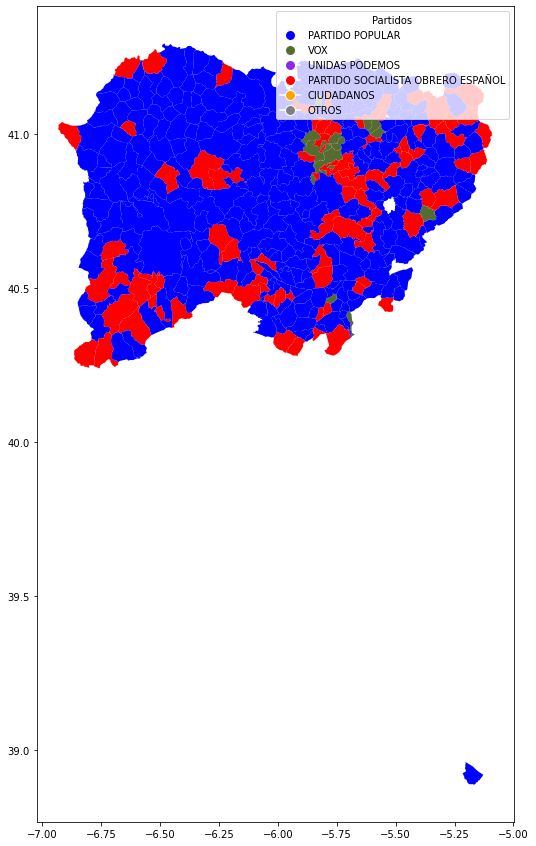

In [56]:

españa=gpd.read_file('mapas/gadm36_ESP_4.shp')
salamanca=españa.merge(df_salamanca, right_on=['cod_municipio'],left_on=['NAME_4'], how='right')


colores = {
    'PARTIDO POPULAR': 'b',
    'VOX': 'darkolivegreen',
    'UNIDAS PODEMOS': 'blueviolet',
    'PARTIDO SOCIALISTA OBRERO ESPAÑOL': 'red',
    'CIUDADANOS': 'orange',
    'OTROS': 'grey',
}


default_color = 'white'

salamanca['colores'] = salamanca['candidatura_new'].map(colores).fillna(default_color)

salamanca.plot(column='candidatura_new', legend=True, color=salamanca['colores'],)
plt.rcParams["figure.figsize"] = (20, 5)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
           for label, color in colores.items()]
plt.legend(handles=handles, title='Partidos',loc='best')
plt.show()